In [212]:
import pandas as pd
import matplotlib.pyplot as plt
proceso1 = pd.read_csv(r"C:\Users\ASUS\SOLENIUM\Eficiencia de motor eléctrico\Datos Ajizal\proceso1.csv")
proceso2 = pd.read_csv(r"C:\Users\ASUS\SOLENIUM\Eficiencia de motor eléctrico\Datos Ajizal\proceso2.csv")
proceso3 = pd.read_csv(r"C:\Users\ASUS\SOLENIUM\Eficiencia de motor eléctrico\Datos Ajizal\proceso3.csv")
proceso4 = pd.read_csv(r"C:\Users\ASUS\SOLENIUM\Eficiencia de motor eléctrico\Datos Ajizal\proceso4.csv")


# Cálculo de la eficiencia de un motor eléctrico

$\eta_{motor}=\frac{P_{out}}{P_{in}}$
<br><br>
La potencia de entrada para un motor trifásico se define de la siguiente manera:
<br><br>
$P_{in} = \frac{V_{L-L}I\cos{\phi}\sqrt{3}}{1000}$
<br><br>
Donde,
<br><br>
$V_{L-L}$: Voltaje RMS, promedio del voltaje linea-linea de las tres fases
<br>$I$: Corriente RMS, promedio de la corriente de las tres fases
<br>$\cos{\phi}$: Factor de potencia
<br>$P_{in}$: Potencia trifásica en kW
<br><br>
Es importante aclarar que en esta ecuación se utiliza el voltaje linea-linea, mientras que en las mediciones se tiene el voltaje linea-neutro. Dado esto, es necesario introducir la relación que permite convertir el voltaje linea-neutro a voltaje linea-linea:
<br>
<br>
$V_{L-L}=V_{L-N}\sqrt{3}$
<br><br>
Introduciendo dicha relación en la ecuación de potencia de entrada ($P_{in}$), se obtiene:
<br><br>
$P_{in} = \frac{3V_{L-N}I\cos{\phi}}{1000}$
<br><br>
La potencia de salida en kW ($P_{out}$) se define así:
<br><br>
$P_{out} = 0.7457*hp*load$
<br><br>
Donde,
<br><br>
$hp$: Potencia nominal del motor (dato de placa en hp)
<br> $load$: Carga del motor en decimal
<br><br>
La carga del motor se calcula como sigue:
<br><br>
$load=\frac{V_{L-L}I}{V_{r}I_{r}}=\frac{V_{L-N}I\sqrt{3}}{V_{r}I_{r}}$
<br><br>
Donde,
<br><br>
$V_{L-L}$: Voltaje RMS, promedio del voltaje linea-linea de las tres fases
<br> $I$: Corriente RMS, promedio de la corriente de las tres fases
<br> $V_{r}$: Voltaje de placa
<br> $I_{r}$: Corriente de placa
<br><br>
NOTA: en la función que calcula la eficiencia se utilizó un criterio tal que cuando la eficiencia calculada es mayor a 100%, esta automáticamente pasa a tomar un valor de 0%.


In [215]:
def eff_motor(hp, V, Vr, I, Ir, PF):
    Pi = (V*I*PF*3)/1000 # Potencia en kW, se multiplica por 3 porque el voltaje es linea neutro
    load = (I*V*(3**0.5))/(Ir*Vr)*100 #carga del motor
    P_out = 0.7457*hp*load
    n = P_out/Pi
    n[n>100] = 0
    return n

In [216]:
def pot_motor_in(V, I, PF):
    Pi = (V*I*PF*3)/1000 # Potencia en kW con voltaje linea neutro
    return Pi

In [217]:
def load_motor(V, Vr, I, Ir):
    load = (I*V*(3**0.5))/(Ir*Vr)*100 #carga del motor en %
    return load

In [218]:
def pot_motor_out(hp, V, Vr, I, Ir):
    load = (I*V*(3**0.5))/(Ir*Vr) #carga del motor
    pot_out = 0.7457*hp*load #Potencia de salida en kW
    return pot_out

In [219]:

def pot_activa(app1, app2, app3):
    app = (app1 + app2 + app3)/3000 #Potencia activa en kW
    return app


# Proceso 1 / Extrusora

El Proceso 1 corresponde a la máquina extrusora y tiene un motor de las siguientes características:

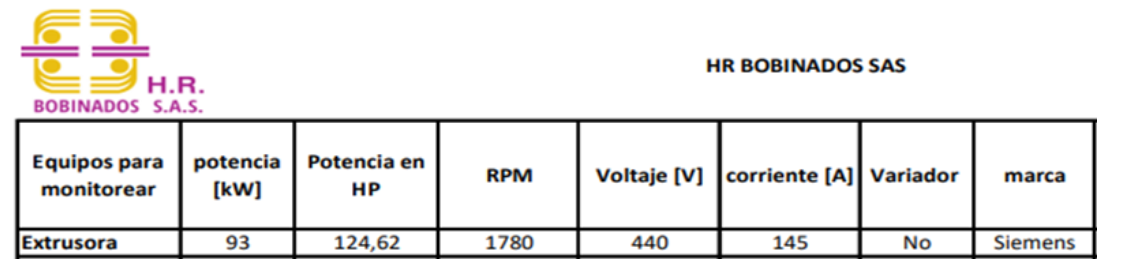

Para el análisis de dicho motor se eligió la medición hecha el 30 de mayo de 2021 entre las 7 y las 9 de la mañana.

In [214]:
proceso1["date_time"] = pd.to_datetime(proceso1["date_time"])
proceso1.set_index("date_time", inplace=True)

In [220]:
hp_1 = 124.62 #Potencia en hp
Vr_1 = 440 #Voltios
Ir_1 = 145 #Amperios
V_1 = (proceso1.vp1 + proceso1.vp2 + proceso1.vp3)/3
I_1 = (proceso1.cp1 + proceso1.cp2 + proceso1.cp3)/3

for i in range(1,4):
    for j in proceso1["pfp" + str(i)]:
        proceso1["pfp" + str(i)] = proceso1["pfp" + str(i)].abs()
        
#PF_1= 0.86
#PF_1 = (proceso1.pfp1 + proceso1.pfp2 + proceso1.pfp3)/3
P_activa_1 = (proceso1.app1.abs() + proceso1.app2.abs() + proceso1.app3.abs())/3000
P_reactiva_1 = (proceso1.rpp1.abs() + proceso1.rpp2.abs() + proceso1.rpp3.abs())/3000
PF_1 = P_activa_1/((P_activa_1**2+P_reactiva_1**2)**(0.5))

## Comparación entre la potencia de entrada y de salida

Para esta comparación se eligió la medición hecha el 30 de mayo de 2021 entre las 6:30 am y las 6:30 pm. Se puede observar que el motor sufre paradas y arranques constantes.

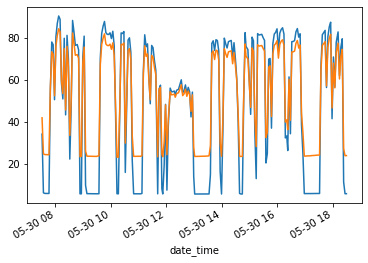

In [330]:

pot_motor_in(V_1, I_1, PF_1)["2021-05-30 07:30":"2021-05-30 18:30"].plot(); #potencia de entrada del motor del proceso 1
pot_motor_out(hp_1, V_1, Vr_1, I_1, Ir_1)["2021-05-30 07:30":"2021-05-30 18:30"].plot();


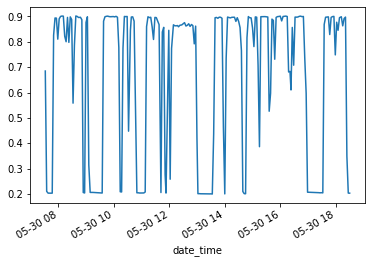

In [332]:
PF_1["2021-05-30 07:30":"2021-05-30 18:30"].plot();

## Carga del motor

Cuando observamos el comportamiento en cuanto a la carga del motor, se observa el mismo fenómeno, que la carga tiene subidas y bajadas súbitas.

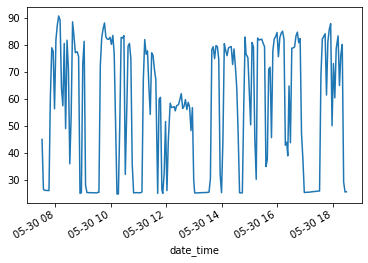

In [333]:
load_motor(V_1, Vr_1, I_1, Ir_1)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

## Eficiencia proceso 1

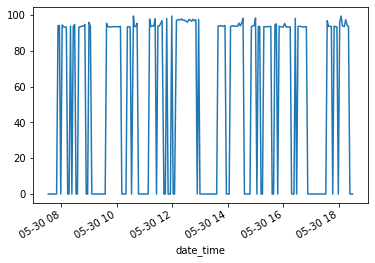

In [334]:
eff_motor(hp_1, V_1, Vr_1, I_1, Ir_1, PF_1)["2021-05-30 07:30":"2021-05-30 18:30"].plot()
#load_motor(V_1, Vr_1, I_1, Ir_1)["2021-05-28"].plot()

# Proceso 2 / Molino Saca Piedra

El Proceso 2 consiste en un molino saca piedra, el cual tiene un motor de las siguientes características:

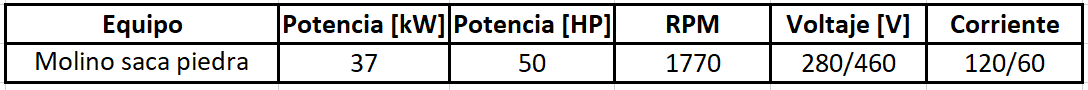

NOTA: En este motor por favor verificar los valores de placa de la corriente

In [226]:
proceso2["date_time"] = pd.to_datetime(proceso2["date_time"])
proceso2.set_index("date_time", inplace=True)

In [298]:
hp_2 = 50 #Potencia en hp
V_2 = (proceso2.vp1 + proceso2.vp2 + proceso2.vp3)/3
I_2 = (proceso2.cp1 + proceso2.cp2 + proceso2.cp3)/3
Vr_2 = 460 #Voltios
Ir_2 = 60 #Amperios
for i in range(1,4):
    for j in proceso2["pfp" + str(i)]:
        proceso2["pfp" + str(i)] = proceso2["pfp" + str(i)].abs()

#PF_2 = (proceso2.pfp1 + proceso2.pfp2 + proceso2.pfp3)/3
P_activa_2 = (proceso2.app1.abs() + proceso2.app2.abs() + proceso2.app3.abs())/3000
P_reactiva_2 = (proceso2.rpp1.abs() + proceso2.rpp2.abs() + proceso2.rpp3.abs())/3000
PF_2 = P_activa_2/((P_activa_2**2+P_reactiva_2**2)**(0.5))

## Comparación entre la potencia de entrada y de salida

Para esta comparación se eligió la medición hecha el 30 de mayo de 2021 entre las 6:30 am y 6:30 pm. Se observa un comportamiento no estable del motor durante su operación.

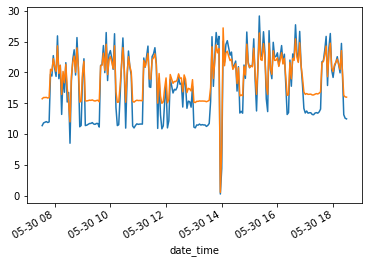

In [336]:

pot_motor_in(V_2, I_2, PF_2)["2021-05-30 07:30":"2021-05-30 18:30"].plot(); #potencia de entrada del motor del proceso 1
pot_motor_out(hp_2, V_2, Vr_2, I_2, Ir_2)["2021-05-30 07:30":"2021-05-30 18:30"].plot();


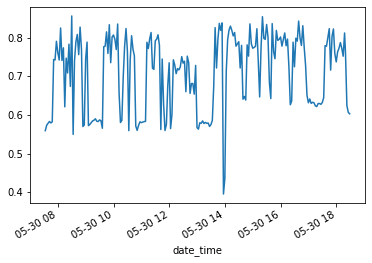

In [338]:
PF_2["2021-05-30 07:30":"2021-05-30 18:30"].plot();

## Carga del motor

Cuando observamos el comportamiento en cuanto a la carga del motor, se observa que el motor mantiene un grado de carga de alredeor de 50%. En la literatura se encuentra que el grado de carga óptimo se encuentra entre el 50% y 100%, siendo 75% el punto donde por lo general se alcanza la potencia nominal del motor. En este sentido, puede decirse que el motor se encuentra operando en una zona inferior a la de su desempeño óptimo.

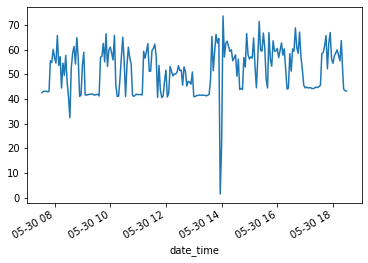

In [339]:
load_motor(V_2, Vr_2, I_2, Ir_2)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

In [340]:
load_motor(V_2, Vr_2, I_2, Ir_2)["2021-05-30 07:30":"2021-05-30 18:30"].describe()

count    220.000000
mean      51.843319
std        9.305280
min        1.472689
25%       43.860523
50%       53.200307
75%       58.906436
max       73.668848
dtype: float64

## Eficiencia del proceso 2

En cuanto a la eficiencia del proceso 2 se encuentran una serie de picos. Estos picos se deben a que cuando la eficiencia es mayor al 100% la función que la calcula asigna un valor nulo (0%), esto debido a que dicha situación no cuenta con sentido físico. Finalmente lo que quieren decir los picos es que hay muchos valores de potencia de entrada y salida que no tienen sentido físico y que por lo tanto la eficiencia calculada a partir de dichos valores toma el valor de 0%.

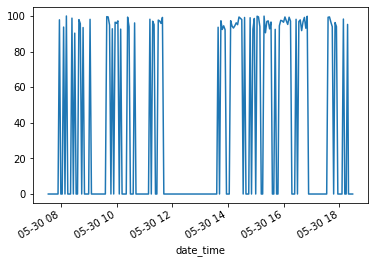

In [341]:
eff_motor(hp_2, V_2, Vr_2, I_2, Ir_2, PF_2)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

# Proceso 3 / Molino Laminador

El proceso 3 consta de un molino laminador que posee un motor de las siguientes características:
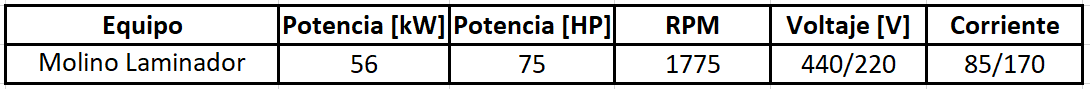

In [236]:
proceso3["date_time"] = pd.to_datetime(proceso3["date_time"])
proceso3.set_index("date_time", inplace=True)

In [307]:
hp_3 = 75 #Potencia en hp
V_3 = (proceso3.vp1 + proceso3.vp2 + proceso3.vp3)/3
I_3 = (proceso3.cp1 + proceso3.cp2 + proceso3.cp3)/3
Vr_3 = 440 #Voltios
Ir_3 = 85 #Amperios
for i in range(1,4):
    for j in proceso3["pfp" + str(i)]:
        proceso3["pfp" + str(i)] = proceso3["pfp" + str(i)].abs()
#PF_3 = 0.81
#PF_3 = (proceso3.pfp1 + proceso3.pfp2 + proceso3.pfp3)/3
P_activa_3 = (proceso3.app1.abs() + proceso3.app2.abs() + proceso3.app3.abs())/3000
P_reactiva_3 = (proceso3.rpp1.abs() + proceso3.rpp2.abs() + proceso3.rpp3.abs())/3000
PF_3 = P_activa_3/((P_activa_3**2+P_reactiva_3**2)**(0.5))

## Comparación entre la potencia de entrada y de salida

En este caso en particular, podemos observar que en todo el rango de operación del motor la curva que representa la potencia de entrada (azul) está por debajo de la curva de la potencia de salida (naranja). Este fenómeno se sugiere que está asociado a los valores de factor de potencia, que alcanzan valores muy bajos durante la operación. En la gráfica que se encuentra debajo se puede ver el comportamiento del factor de potencia.

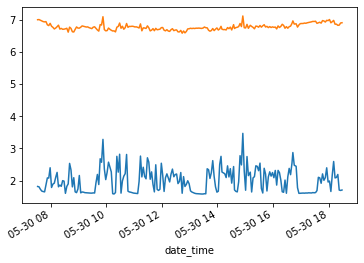

In [308]:
pot_motor_in(V_3, I_3, PF_3)["2021-05-30 07:30":"2021-05-30 18:30"].plot(); #potencia de entrada del motor del proceso 1
pot_motor_out(hp_3, V_3, Vr_3, I_3, Ir_3)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

En el horario en el cual la planta se encuentra en funcionamiento (6:30 am y 6:30 pm) el factor de potencia tiene un promedio de 0.25, un máximo de 0.42 y un mínimo de 0.2. Estos valores afectan directamente al valor de la potencia de entrada.

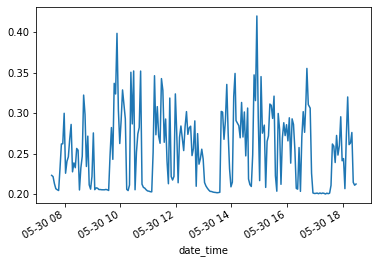

In [309]:
PF_3["2021-05-30 07:30":"2021-05-30 18:30"].plot();

## Carga del motor

Durante la operación puede observarse que el motor opera a una carga aproximada del 12% durante toda la jornada laboral. Este nivel de carga es demasiado bajo para la potencia del motor, ya que siempre se recomienda que los motores eléctricos operen a un nivel de carga al menos superior al 50%, siendo 75% el punto óptimo.

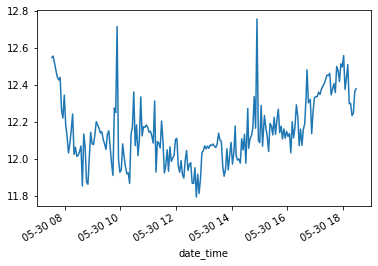

In [310]:
load_motor(V_3, Vr_3, I_3, Ir_3)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

## Eficiencia del proceso 3

Para calcular la eficiencia, la función asociada compara la potencia de entrada y de salida. Si la potencia de entrada es menor que la potencia de salida, inmediatamente el valor de la eficiencia tomará un valor de cero, ya que esta situación no tiene sentido físico.
<br> En el caso de este proceso, la potencia de salida excede en todo el intervalo a la potencia de entrada, lo que termina implicando valores nulos de eficiencia, como muestra la gráfica de abajo.

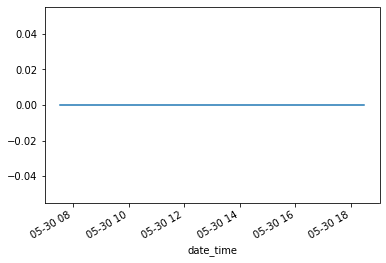

In [329]:
eff_motor(hp_3, V_3, Vr_3, I_3, Ir_3, PF_3)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

# Proceso 4 / Molino Desintegrador

El Proceso 4 consiste en un molino desintegrador, el cual tiene un motor de las siguientes características:
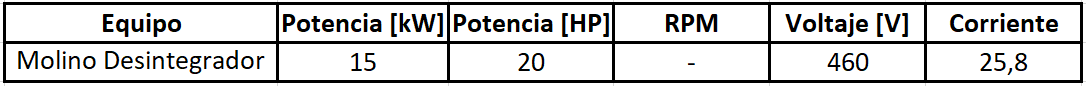

In [243]:
proceso4["date_time"] = pd.to_datetime(proceso4["date_time"])
proceso4.set_index("date_time", inplace=True)

In [312]:
hp_4 = 20 #Potencia en hp
V_4 = (proceso4.vp1 + proceso4.vp2 + proceso4.vp3)/3
I_4 = (proceso4.cp1 + proceso4.cp2 + proceso4.cp3)/3
Vr_4 = 460 #Voltios460
Ir_4 = 25.8 #Amperios
for i in range(1,4):
    for j in proceso4["pfp" + str(i)]:
        proceso4["pfp" + str(i)] = proceso4["pfp" + str(i)].abs()
#PF_3 = 0.81
#PF_3 = (proceso3.pfp1 + proceso3.pfp2 + proceso3.pfp3)/3
P_activa_4 = (proceso4.app1.abs() + proceso4.app2.abs() + proceso4.app3.abs())/3000
P_reactiva_4 = (proceso4.rpp1.abs() + proceso4.rpp2.abs() + proceso4.rpp3.abs())/3000
PF_4 = P_activa_4/((P_activa_4**2+P_reactiva_4**2)**(0.5))

## Comparación entre potencia de entrada y de salida

Al igual que en el proceso anterior, los valores de potencia de salida son mucho mayores a aquellos de potencia de entrada. Este fenómeno se sugiere que se da por los valores que toma el factor de potencia.

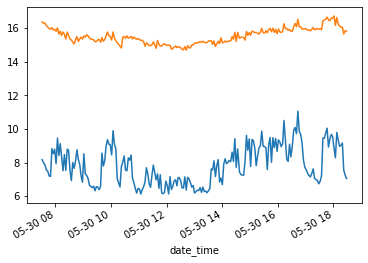

In [317]:
pot_motor_in(V_4, I_4, PF_4)["2021-05-30 07:30":"2021-05-30 18:30"].plot(); #potencia de entrada del motor del proceso 1
pot_motor_out(hp_4, V_4, Vr_4, I_4, Ir_4)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

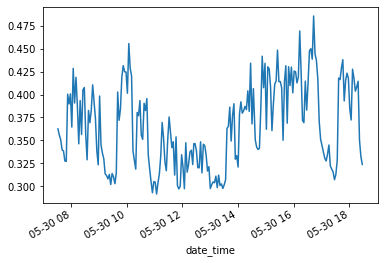

In [319]:
PF_4["2021-05-30 07:30":"2021-05-30 18:30"].plot();

In [320]:
PF_4["2021-05-30 07:30":"2021-05-30 18:30"].describe()

count    220.000000
mean       0.365824
std        0.045041
min        0.291697
25%        0.327543
50%        0.361437
75%        0.406620
max        0.485477
dtype: float64

## Carga del motor

En este caso en particular se encontró que la carga del motor es mayor al 100%, con un promedio de 104. Esto implica que el motor está operando a su plena capacidad. En la literatura se sugiere que la carga óptima se encuentra a un 75%.

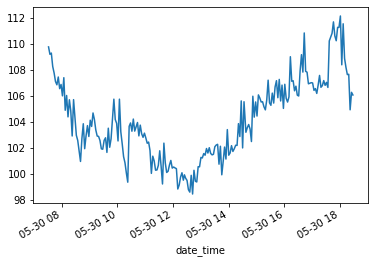

In [326]:
load_motor(V_4, Vr_4, I_4, Ir_4)["2021-05-30 07:30":"2021-05-30 18:30"].plot();

## Eficiencia del proceso 4

Dado que los valores de potencia de salida son menores a los de potencia de entrada, las eficiencias calculadas son mayores al 100%. La función que calcula la eficiencia, al identificar dicha situación le asigna inmediatamente un valor nulo a la eficiencia, es por esto que la gráfica es una línea recta a lo largo del cero.

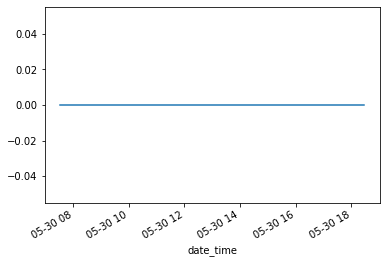

In [328]:
eff_motor(hp_4, V_4, Vr_4, I_4, Ir_4, PF_4)["2021-05-30 07:30":"2021-05-30 18:30"].plot();